In [1]:
import matplotlib.pyplot as plt
import pyplotbrookings.pyplotbrookings as ppb
import seaborn as sns

# Brookings plot theme for all plots
ppb.set_theme()

# Getting data
penguins = sns.load_dataset("penguins")

First let's create a histogram plot using base `matplotlib`

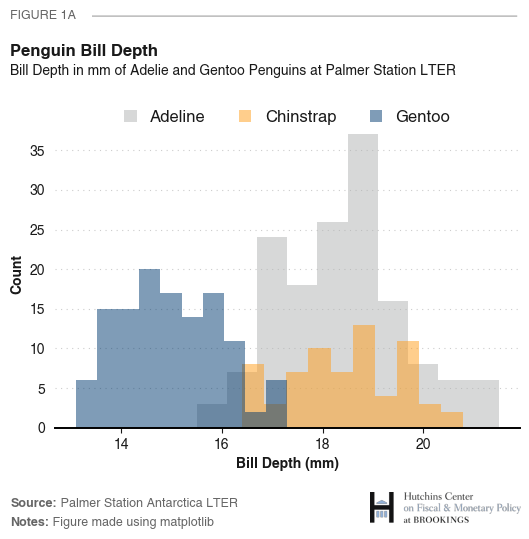

In [2]:
# Setting brand colors for current plot
ppb.set_palette('3-color B', reverse=True)

# Plotting histograms
plt.hist(penguins[penguins['species'] == 'Adelie']['bill_depth_mm'], alpha=0.5, label='Adeline')
plt.hist(penguins[penguins['species'] == 'Chinstrap']['bill_depth_mm'], alpha=0.5, label='Chinstrap')
plt.hist(penguins[penguins['species'] == 'Gentoo']['bill_depth_mm'], alpha=0.5, label='Gentoo')
# Adding matplotlib legend/labels
plt.legend(ncol=3)
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Count')

# Adding Brookings titles
ppb.add_title(title='Penguin Bill Depth', 
              subtitle='Bill Depth in mm of Adelie and Gentoo Penguins at Palmer Station LTER', 
              tag='FIGURE 1A')

# Adding notes
# Note, that there is auto parsing in add_notes that will bold all text before the first colon!
ppb.add_notes('Source: Palmer Station Antarctica LTER', 
              'Notes: Figure made using matplotlib')

# Adding the Hutchins logo
ppb.add_logo('hc')

# Figures can be saved using a built in method or with matplotlb
ppb.save('Figure1A.png')
# NOTE: If using pyplot make sure you add bbox_inches='tight' so titles are not cropped
plt.savefig('Figure1A.png', bbox_inches='tight')

`pyplotbrookings` also works with `seaborn` for plotting! Let's recreate the above figure again but this time in `seaborn`.

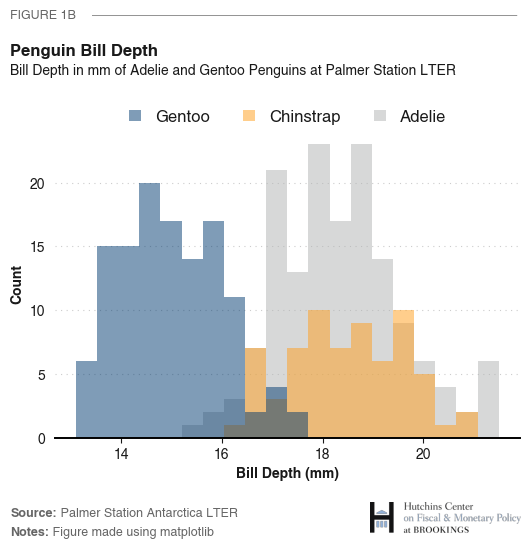

In [3]:
# Reversing data to get the correct z-order ordering of plots
ax = sns.histplot(data=penguins.iloc[::-1], 
                  x='bill_depth_mm', 
                  hue='species', 
                  # Setting the plot palette to Brookings 3-color
                  palette=ppb.get_palette('3-color B'), 
                  bins=20)
# Moving the legend in seaborn to the top
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1.05), ncol=3, title=None, frameon=False)
plt.xlabel('Bill Depth (mm)')

# Adding Brookings titles
ppb.add_title(title='Penguin Bill Depth', 
              subtitle='Bill Depth in mm of Adelie and Gentoo Penguins at Palmer Station LTER', 
              tag='FIGURE 1B')

# Adding notes
ppb.add_notes('Source: Palmer Station Antarctica LTER', 
              'Notes: Figure made using matplotlib')

ppb.add_logo('hc')

`pyplotbrookings` can be used with many different plots. Let's create one with a colormap!

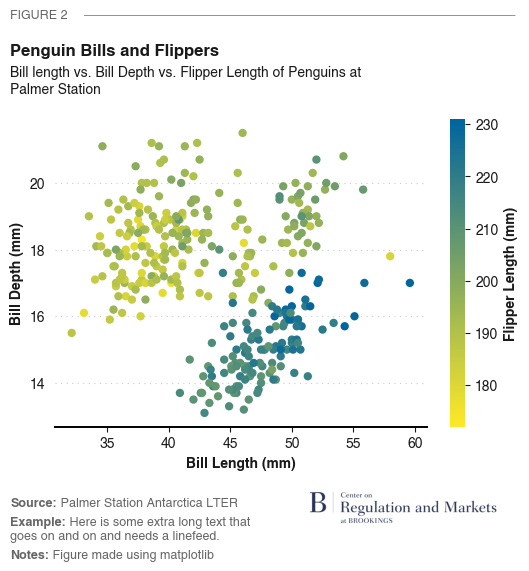

In [4]:
# Getting the Brookings sequential colormap
cmap = ppb.get_cmap('sequential (two hues)', reverse=True)
# Creating a scatter plot
plt.scatter(data=penguins, x='bill_length_mm', y='bill_depth_mm', c='flipper_length_mm', cmap=cmap)

# Adding matplotlib legend/labels
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# Adding color bar
cbar = plt.colorbar(cmap=cmap)
cbar.set_label('Flipper Length (mm)')
cbar.outline.set_visible(False)

# Adding Brookings titles
ppb.add_title(title='Penguin Bills and Flippers', 
              subtitle='Bill length vs. Bill Depth vs. Flipper Length of Penguins at\nPalmer Station', 
              tag='FIGURE 2')

# Adding notes
ppb.add_notes('Source: Palmer Station Antarctica LTER',
              'Example: Here is some extra long text that\ngoes on and on and needs a linefeed.',
              'Notes: Figure made using matplotlib')


# Adding a CRM logo
ppb.add_logo('crm', scale=0.35, offsets=(-0.1, 0))
ppb.save('Figure2.png')

Note that notes and titles auto-align to the left margin of the figure. Notes and titles can also be adjusted manually with padding.

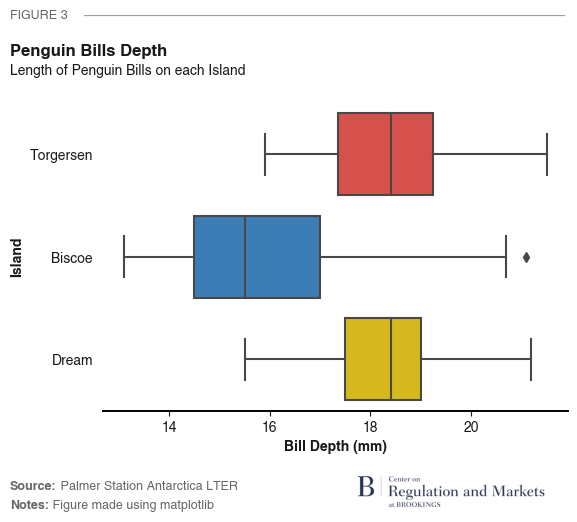

In [9]:
# Creating a boxplot
ax = sns.boxplot(data=penguins, x='bill_depth_mm', y='island', palette=ppb.get_palette('3-political A'))


# Adding Brookings titles
ppb.add_title(title='Penguin Bills Depth', 
              subtitle='Length of Penguin Bills on each Island', 
              tag='FIGURE 3')

# Adding notes
ppb.add_notes('Source: Palmer Station Antarctica LTER', 
              'Notes: Figure made using matplotlib')


# Adding matplotlib legend/labels
ax.set_xlabel('Bill Depth (mm)')
ax.set_ylabel('Island')

ppb.add_logo('crm', scale=0.35, offsets=(-0.1, 0))
ppb.save('Figure3.png')